This project will take a look at how Earth compares to the 4296 exoplanets (planets not within our solar system) confirmed by NASA in their Confirmed Exoplanets dataset.

In [116]:
import pandas as pd
import math as math
pd.options.display.max_columns = None

import matplotlib
import matplotlib.pyplot as plt
# important! Need to tell Jupyter to display plots within the notebook
%matplotlib inline

In [2]:
import requests

resp = requests.get('https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets&format=json')
txt = resp.json()
imprt = pd.DataFrame(txt)
imprt

,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_controvflag,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbpern,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_orbsmaxn,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_orbeccenn,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbincllim,pl_orbincln,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassn,pl_bmassprov,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_radn,pl_dens,pl_denserr1,pl_denserr2,pl_denslim,pl_densn,pl_ttvflag,pl_kepflag,pl_k2flag,ra_str,dec_str,ra,st_raerr,dec,st_decerr,st_posn,st_dist,st_disterr1,st_disterr2,st_distlim,st_distn,st_optmag,st_optmagerr,st_optmaglim,st_optband,gaia_gmag,gaia_gmagerr,gaia_gmaglim,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_teffn,st_mass,st_masserr1,st_masserr2,st_masslim,st_massn,st_rad,st_raderr1,st_raderr2,st_radlim,st_radn,pl_nnotes,rowupdate,pl_facility
0,Kepler-135,b,Kepler-135 b,Transit,0,2,6.002530,0.000016,-0.000016,0.0,3,0.067,NaN,NaN,0.0,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,None,0.161,0.031,-0.031,0.0,3,NaN,NaN,NaN,NaN,0,0,1,0,19h21m58.83s,+38d47m43.7s,290.495129,0.000019,38.795481,0.000017,2,632.99,11.13,-11.13,0.0,3,12.730,NaN,0.0,Kepler-band,12.679,None,0.0,6090.00,120.00,-120.00,0.0,6,NaN,NaN,NaN,NaN,1,1.27,0.24,-0.24,0.0,6,1,2014-05-14,Kepler
1,Kepler-135,c,Kepler-135 c,Transit,0,2,11.448708,0.000145,-0.000145,0.0,3,0.103,NaN,NaN,0.0,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,None,0.103,0.021,-0.021,0.0,3,NaN,NaN,NaN,NaN,0,0,1,0,19h21m58.83s,+38d47m43.7s,290.495129,0.000019,38.795481,0.000017,2,632.99,11.13,-11.13,0.0,3,12.730,NaN,0.0,Kepler-band,12.679,None,0.0,6090.00,120.00,-120.00,0.0,6,NaN,NaN,NaN,NaN,1,1.27,0.24,-0.24,0.0,6,1,2014-05-14,Kepler
2,Kepler-133,c,Kepler-133 c,Transit,0,2,31.517586,0.000158,-0.000158,0.0,4,0.204,NaN,NaN,0.0,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,None,0.253,0.043,-0.043,0.0,3,NaN,NaN,NaN,NaN,0,0,1,0,19h49m06.71s,+48d19m13.2s,297.277976,0.000019,48.320328,0.000017,2,665.37,19.72,-19.72,0.0,3,12.848,NaN,0.0,Kepler-band,12.841,None,0.0,5736.00,100.00,-100.00,0.0,6,NaN,NaN,NaN,NaN,1,1.43,0.24,-0.24,0.0,6,1,2014-05-14,Kepler
3,Kepler-134,b,Kepler-134 b,Transit,0,2,5.317429,0.000008,-0.000008,0.0,4,0.060,NaN,NaN,0.0,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,None,0.178,0.035,-0.035,0.0,3,NaN,NaN,NaN,NaN,0,0,1,0,18h58m57.36s,+49d35m54.2s,284.739001,0.000017,49.598396,0.000017,2,338.05,2.42,-2.42,0.0,3,12.324,NaN,0.0,Kepler-band,12.222,None,0.0,5983.00,150.00,-150.00,0.0,5,NaN,NaN,NaN,NaN,1,1.18,0.23,-0.23,0.0,5,1,2014-05-14,Kepler
4,Kepler-134,c,Kepler-134 c,Transit,0,2,10.105785,0.000053,-0.000053,0.0,4,0.092,NaN,NaN,0.0,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,None,0.112,0.022,-0.022,0.0,3,NaN,NaN,NaN,NaN,0,0,1,0,18h58m57.36s,+49d35m54.2s,284.739001,0.000017,49.598396,0.000017,2,338.05,2.42,-2.42,0.0,3,12.324,NaN,0.0,Kepler-band,12.222,None,0.0,5983.00,150.00,-150.00,0.0,5,NaN,NaN,NaN,NaN,1,1.18,0.23,-0.23,0.0,5,1,2014-05-14,Kepler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,Kepler-1666,c,Kepler-1666 c,Transit,0,2,40.715700,NaN,NaN,0.0,2,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,0.0,0,None,0.289,NaN,NaN,0.0,1,NaN,NaN,NaN,0.0,0,0,1,0,19h51m48.38s,+46d15m53.0s,297.951578,0.000017,46.264717,0.000017,2,1434.42,57.40,-57.40,0.0,1,15.083,NaN,0.0,Kepler-band,15.015,None,0.0,5818.75,234.25,-65.75,0.0,3,NaN,NaN,NaN,0.0,0,1.21,0.03,-0.09,0.0,3,0,2020-09-03,Kepler
4292,Kepler-783,c,Kepler-783 c,Transit,0,2,7.053950,NaN,NaN,0.0,2,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,0.0,0,None,0.208,NaN,NaN,0.0,1,NaN,NaN,NaN,0.0,0,0,1,0,19h24m15.10s,+47d29m

Here I am filtering and cleaning the dataset. With use of the Data Column Definitions Documentation (ref: https://exoplanetarchive.ipac.caltech.edu/docs/API_exoplanet_columns.html), I use drop to delete data that is not relevant to the analysis I want to undertake on the dataset, and at the same time give more readable names to the relevant data. I also extracted data on the year of the last update from the column 'date of last update', as year will be more useful for visualisations over long periods of time.

In [137]:
df = imprt
df = df.drop(columns = ['pl_letter', 'pl_controvflag', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_orbsmaxn', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_orbincl', 'pl_orbinclerr1', 'pl_orbinclerr2', 'pl_orbincllim', 'pl_orbincln', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_radjerr2', 'pl_radjlim', 'pl_denserr2', 'pl_denslim', 'pl_densn', 'ra_str', 'dec_str', 'st_disterr2', 'st_distlim', 'st_optmaglim', 'gaia_gmaglim', 'st_tefferr2', 'st_tefflim', 'st_masserr2', 'st_masslim', 'st_raderr2', 'st_radlim'], axis=1)

df = df.rename(columns = {'pl_hostname': 'Star name', 'pl_name' : 'Planet name', 'pl_discmethod' : 'Discovery method', 'pl_pnum' : 'Number of planets in the stellar system', 'pl_orbper' : 'Days in a year', 'pl_orbpererr1' : 'Days in a year error (+/-)', 'pl_orbpern' : 'Year length number of measurements', 'pl_orbeccen' : 'Eccentricity', 'pl_orbeccenerr1' : 'Eccentricity error (+/-)', 'pl_orbeccenn' : 'Eccentricity number of measurements', 'pl_bmassj' : 'Planet mass (compared to Jupiter)', 'pl_bmassjerr1' : 'Planet mass error (+/-)', 'pl_bmassn' : 'Planet mass number of measurements', 'pl_radj' : 'Planet radius (compared to Jupiter)', 'pl_radjerr1' : 'Planet radius error (+/-)', 'pl_radn' : 'Planet radius number of measurements', 'pl_dens' : 'Planet density', 'pl_denserr1' : 'Density error (+/-)', 'pl_densn' : 'Planet density number of measurements', 'pl_ttvflag' : 'TTV Flag', 'pl_kepflag' : 'Kepler Field data', 'pl_k2flag' : 'K2 Mission data', 'ra' : 'Right acsension', 'st_raerr' : 'RA error', 'dec' : 'Declination', 'st_decerr' : 'Declination error', 'st_posn' : 'Right incline and declination number of measurements', 'st_dist' : 'Star distance in Parsecs', 'st_disterr1' : 'Distance error (+/-)', 'st_distn' : 'Distance number of measurements', 'st_optmag' : 'Optical magnitude', 'st_optmagerr' : 'Optical magnitude error', 'st_optband' : 'Optical magnitude band', 'gaia_gmag' : 'Gaia magnitude', 'gaia_gmagerr' : 'Gaia magnitude error', 'st_teff' : 'Star temperature', 'st_tefferr1' : 'Temperature error (+/-)', 'st_teffn' : 'Temperature number of measurements', 'st_mass' : 'Star mass (compared to the Sun)', 'st_masserr1' : 'Star mass error (+/-)', 'st_massn' : 'Star mass number of measurements', 'st_rad' : 'Star radius (compared to the Sun)', 'st_raderr1' : 'Star radius error (+/-)', 'st_radn' : 'Star radius number of measurements', 'pl_nnotes' : 'Number of notes taken on planet', 'rowupdate' : 'Date of last update', 'pl_facility' : 'Discovery facility'})


mass_e = df['Planet mass (compared to Jupiter)'] / 0.0031463520
for x in mass_e:
    
    if(math.isnan(x)):
        x = x
    else:
        formatted = '{:.5f}'.format(x)
        x = float(formatted)


df.insert(10, 'Planet mass (compared to Earth)', mass_e)


df

,Star name,Planet name,Discovery method,Number of planets in the stellar system,Days in a year,Days in a year error (+/-),Year length number of measurements,Eccentricity,Eccentricity error (+/-),Eccentricity number of measurements,Planet mass (compared to Earth),Planet mass (compared to Jupiter),Planet mass error (+/-),Planet mass number of measurements,Planet radius (compared to Jupiter),Planet radius error (+/-),Planet radius number of measurements,Planet density,Density error (+/-),TTV Flag,Kepler Field data,K2 Mission data,Right acsension,RA error,Declination,Declination error,Right incline and declination number of measurements,Star distance in Parsecs,Distance error (+/-),Distance number of measurements,Optical magnitude,Optical magnitude error,Optical magnitude band,Gaia magnitude,Gaia magnitude error,Star temperature,Temperature error (+/-),Temperature number of measurements,Star mass (compared to the Sun),Star mass error (+/-),Star mass number of measurements,Star radius (compared to the Sun),Star radius error (+/-),Star radius number of measurements,Number of notes taken on planet,Date of last update,Discovery facility
0,Kepler-135,Kepler-135 b,Transit,2,6.002530,0.000016,3,NaN,NaN,0,NaN,NaN,NaN,0,0.161,0.031,3,NaN,NaN,0,1,0,290.495129,0.000019,38.795481,0.000017,2,632.99,11.13,3,12.730,NaN,Kepler-band,12.679,None,6090.00,120.00,6,NaN,NaN,1,1.27,0.24,6,1,2014-05-14,Kepler
1,Kepler-135,Kepler-135 c,Transit,2,11.448708,0.000145,3,NaN,NaN,0,NaN,NaN,NaN,0,0.103,0.021,3,NaN,NaN,0,1,0,290.495129,0.000019,38.795481,0.000017,2,632.99,11.13,3,12.730,NaN,Kepler-band,12.679,None,6090.00,120.00,6,NaN,NaN,1,1.27,0.24,6,1,2014-05-14,Kepler
2,Kepler-133,Kepler-133 c,Transit,2,31.517586,0.000158,4,NaN,NaN,0,NaN,NaN,NaN,0,0.253,0.043,3,NaN,NaN,0,1,0,297.277976,0.000019,48.320328,0.000017,2,665.37,19.72,3,12.848,NaN,Kepler-band,12.841,None,5736.00,100.00,6,NaN,NaN,1,1.43,0.24,6,1,2014-05-14,Kepler
3,Kepler-134,Kepler-134 b,Transit,2,5.317429,0.000008,4,NaN,NaN,0,NaN,NaN,NaN,0,0.178,0.035,3,NaN,NaN,0,1,0,284.739001,0.000017,49.598396,0.000017,2,338.05,2.42,3,12.324,NaN,Kepler-band,12.222,None,5983.00,150.00,5,NaN,NaN,1,1.18,0.23,5,1,2014-05-14,Kepler
4,Kepler-134,Kepler-134 c,Transit,2,10.105785,0.000053,4,NaN,NaN,0,NaN,NaN,NaN,0,0.112,0.022,3,NaN,NaN,0,1,0,284.739001,0.000017,49.598396,0.000017,2,338.05,2.42,3,12.324,NaN,Kepler-band,12.222,None,5983.00,150.00,5,NaN,NaN,1,1.18,0.23,5,1,2014-05-14,Kepler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,Kepler-1666,Kepler-1666 c,Transit,2,40.715700,NaN,2,NaN,NaN,0,NaN,NaN,NaN,0,0.289,NaN,1,NaN,NaN,0,1,0,297.951578,0.000017,46.264717,0.000017,2,1434.42,57.40,1,15.083,NaN,Kepler-band,15.015,None,5818.75,234.25,3,NaN,NaN,0,1.21,0.03,3,0,2020-09-03,Kepler
4292,Kepler-783,Kepler-783 c,Transit,2,7.053950,NaN,2,NaN,NaN,0,NaN,NaN,NaN,0,0.208,NaN,1,NaN,NaN,0,1,0,291.062936,0.000025,47.484803,0.000017,2,544.00,27.74,3,13.916,NaN,Kepler-band,13.938,None,5521.00,66.78,5,0.93,0.03,1,0.89,0.04,5,0,2020-09-03,Kepler
4293,Kepler-1667,Kepler-1667 b,Transit,1,83.578100,NaN,2,NaN,NaN,0,NaN,NaN,NaN,0,0.266,NaN,1,NaN,NaN,0,1,0,283.532958,0.000019,48.094261,0.000017,2,638.35,6.30,1,13.498,NaN,Kepler-band,13.446,None,5951.00,555.00,4,NaN,NaN,0,1.06,0.08,3,0,2020-09-03,Kepler
4294,Kepler-1668,Kepler-1668 b,Transit,1,15.434000,NaN,2,NaN,NaN,0,NaN,NaN,NaN,0,0.388,NaN,1,NaN,NaN,0,1,0,297.352316,0.000019,46.095931,0.000017,2,1386.19,65.18,1,15.703,NaN,Kepler-band,15.677,None,5328.33,25.17,3,NaN,NaN,1,1.05,0.01,3,0,2020-09-03,Kepler


In [138]:
df['Planet mass (compared to Jupiter)'].tolist()

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.00021,
 0.0062,
 0.00201,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.295,
 2.03,
 6.0,
 3.204,
 3.06,
 4.85,
 1.97,
 0.0321,
 0.0371,
 0.057,
 6.1,
 1.993,
 3.85,
 3.097,
 3.08,
 2.25,
 1.112,
 1.8,
 8.06,
 7.659,
 17.193,
 0.27,
 2.88,
 4.04,
 0.66,
 2.62,
 2.72,
 2.7,
 8.97,
 0.598,
 1.69,
 0.15,
 8.03,
 0.081,
 0.916,
 20.13,
 1.685,
 2.54,
 0.02,
 0.64,
 0.54,
 0.4,
 3.95,
 0.51,
 5.58,
 0.02,
 0.33,
 1.26,
 2.223,
 1.05,
 0.57,
 1.3,
 2.6,
 13.0,
 0.2,
 10.39,
 1.0,
 0.066,
 16.64,
 1.118,
 1.45,
 3.09,
 2.12,
 8.37,
 0.7,
 1.13,
 6.575,
 5.21,
 15.89,
 2.43,
 0.026,
 0.98,
 0.48,
 1.42,
 15.04,
 3.9,
 0.36,
 1.31,
 0.59,
 0.30425,
 0.02,
 0.40902,
 0.5267,
 6.0,
 9.18,
 1.38,
 5.98,
 9.0,
 3.57,
 1.01,
 0.836,
 0.523,
 1.99,
 1.5,
 1.13,
 1.54,
 0.06,
 1.985,
 3.1,
 0.56,
 0.0532,
 0.076,
 2.096,
 3.98,
 3.18,

In [139]:
df['Planet mass (compared to Earth)'].tolist()

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.06674396253184642,
 1.970536036654513,
 0.6388350699476728,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 411.5877689463862,
 645.1916378078486,
 1906.9703580527546,
 1018.3221712001709,
 972.5548826069048,
 1541.467706092643,
 626.121934227321,
 10.202291415582236,
 11.791433380626199,
 18.11621840150117,
 1938.7531973536336,
 633.4319872665234,
 1223.6393130838508,
 984.3145331482301,
 978.9114504670807,
 715.113884269783,
 353.4251730257772,
 572.0911074158264,
 2561.696847650867,
 2434.247662054341,
 5464.423561000169,
 85.81366611237397,
 915.3457718653221,
 1284.0267077555213,
 209.76673938580302,
 832.7103896830362,
 864.4932289839154,
 858.1366611237396,
 2850.9206852888683,
 190.06137901925786,
 537.1299841848592,
 47.67425895131886,
 2552.161995860603,
 25.744099833712188,
 291.1308079960539,
 6397.885551266992

In [4]:
year = df['Date of last update'].str.split('-').str[0].tolist()
df.insert(45, 'Year of last update', year)
df

,Star name,Planet name,Discovery method,Number of planets in the stellar system,Days in a year,Days in a year error (+/-),Year length number of measurements,Eccentricity,Eccentricity error (+/-),Eccentricity number of measurements,Planet mass (compared to Jupiter),Planet mass error (+/-),Planet mass number of measurements,Planet radius (compared to Jupiter),Planet radius error (+/-),Planet radius number of measurements,Planet density,Density error (+/-),TTV Flag,Kepler Field data,K2 Mission data,Right acsension,RA error,Declination,Declination error,Right incline and declination number of measurements,Star distance in Parsecs,Distance error (+/-),Distance number of measurements,Optical magnitude,Optical magnitude error,Optical magnitude band,Gaia magnitude,Gaia magnitude error,Star temperature,Temperature error (+/-),Temperature number of measurements,Star mass (compared to the Sun),Star mass error (+/-),Star mass number of measurements,Star radius (compared to the Sun),Star radius error (+/-),Star radius number of measurements,Number of notes taken on planet,Date of last update,Year of last update,Discovery facility
0,Kepler-135,Kepler-135 b,Transit,2,6.002530,0.000016,3,NaN,NaN,0,NaN,NaN,0,0.161,0.031,3,NaN,NaN,0,1,0,290.495129,0.000019,38.795481,0.000017,2,632.99,11.13,3,12.730,NaN,Kepler-band,12.679,None,6090.00,120.00,6,NaN,NaN,1,1.27,0.24,6,1,2014-05-14,2014,Kepler
1,Kepler-135,Kepler-135 c,Transit,2,11.448708,0.000145,3,NaN,NaN,0,NaN,NaN,0,0.103,0.021,3,NaN,NaN,0,1,0,290.495129,0.000019,38.795481,0.000017,2,632.99,11.13,3,12.730,NaN,Kepler-band,12.679,None,6090.00,120.00,6,NaN,NaN,1,1.27,0.24,6,1,2014-05-14,2014,Kepler
2,Kepler-133,Kepler-133 c,Transit,2,31.517586,0.000158,4,NaN,NaN,0,NaN,NaN,0,0.253,0.043,3,NaN,NaN,0,1,0,297.277976,0.000019,48.320328,0.000017,2,665.37,19.72,3,12.848,NaN,Kepler-band,12.841,None,5736.00,100.00,6,NaN,NaN,1,1.43,0.24,6,1,2014-05-14,2014,Kepler
3,Kepler-134,Kepler-134 b,Transit,2,5.317429,0.000008,4,NaN,NaN,0,NaN,NaN,0,0.178,0.035,3,NaN,NaN,0,1,0,284.739001,0.000017,49.598396,0.000017,2,338.05,2.42,3,12.324,NaN,Kepler-band,12.222,None,5983.00,150.00,5,NaN,NaN,1,1.18,0.23,5,1,2014-05-14,2014,Kepler
4,Kepler-134,Kepler-134 c,Transit,2,10.105785,0.000053,4,NaN,NaN,0,NaN,NaN,0,0.112,0.022,3,NaN,NaN,0,1,0,284.739001,0.000017,49.598396,0.000017,2,338.05,2.42,3,12.324,NaN,Kepler-band,12.222,None,5983.00,150.00,5,NaN,NaN,1,1.18,0.23,5,1,2014-05-14,2014,Kepler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,Kepler-1666,Kepler-1666 c,Transit,2,40.715700,NaN,2,NaN,NaN,0,NaN,NaN,0,0.289,NaN,1,NaN,NaN,0,1,0,297.951578,0.000017,46.264717,0.000017,2,1434.42,57.40,1,15.083,NaN,Kepler-band,15.015,None,5818.75,234.25,3,NaN,NaN,0,1.21,0.03,3,0,2020-09-03,2020,Kepler
4292,Kepler-783,Kepler-783 c,Transit,2,7.053950,NaN,2,NaN,NaN,0,NaN,NaN,0,0.208,NaN,1,NaN,NaN,0,1,0,291.062936,0.000025,47.484803,0.000017,2,544.00,27.74,3,13.916,NaN,Kepler-band,13.938,None,5521.00,66.78,5,0.93,0.03,1,0.89,0.04,5,0,2020-09-03,2020,Kepler
4293,Kepler-1667,Kepler-1667 b,Transit,1,83.578100,NaN,2,NaN,NaN,0,NaN,NaN,0,0.266,NaN,1,NaN,NaN,0,1,0,283.532958,0.000019,48.094261,0.000017,2,638.35,6.30,1,13.498,NaN,Kepler-band,13.446,None,5951.00,555.00,4,NaN,NaN,0,1.06,0.08,3,0,2020-09-03,2020,Kepler
4294,Kepler-1668,Kepler-1668 b,Transit,1,15.434000,NaN,2,NaN,NaN,0,NaN,NaN,0,0.388,NaN,1,NaN,NaN,0,1,0,297.352316,0.000019,46.095931,0.000017,2,1386.19,65.18,1,15.703,NaN,Kepler-band,15.677,None,5328.33,25.17,3,NaN,NaN,1,1.05,0.01,3,0,2020-09-03,2020,Kepler


In [5]:
df.isnull().sum()

Star name                                                  0
Planet name                                                0
Discovery method                                           0
Number of planets in the stellar system                    0
Days in a year                                           139
Days in a year error (+/-)                               316
Year length number of measurements                         0
Eccentricity                                            2768
Eccentricity error (+/-)                                3247
Eccentricity number of measurements                        0
Planet mass (compared to Jupiter)                       2516
Planet mass error (+/-)                                 2664
Planet mass number of measurements                         0
Planet radius (compared to Jupiter)                     1004
Planet radius error (+/-)                               1086
Planet radius number of measurements                       0
Planet density          

Number of planets in the stellar system
1    2466
2     970
3     459
4     240
5     110
6      36
7       7
8       8
dtype: int64
<BarContainer object of 8 artists>


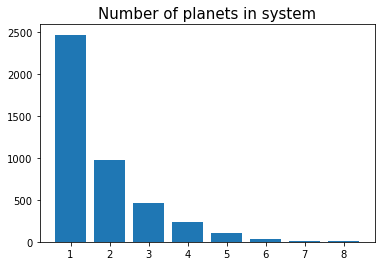

In [55]:
s2 = df.groupby(['Number of planets in the stellar system']).size()
print(s2)
plt.title('Number of planets in system', fontsize=15)
print(plt.bar(s2.index, s2.values))

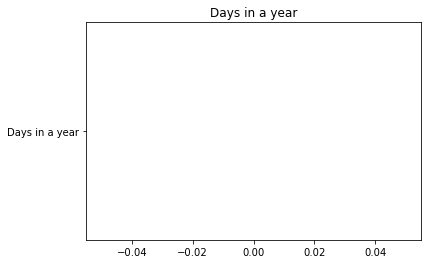

In [78]:
s3 = df.groupby(['Days in a year'])
plt.title('Days in a year')
plt.plot('Days in a year')

In [48]:
df.groupby('Kepler Field data').size()

Kepler Field data
0    1884
1    2412
dtype: int64

In [90]:
df['Days in a year'].mean()

2071.5273291619083

In [ ]:
facilities = df.groupby('Discovery facility')
series = facilities.size()
series = series[series.values > 40]

plt.figure(figsize=(10,10))
plt.ylabel('Dicovery Facilities', fontsize=20)
plt.xlabel('Discoveries', fontsize=20)
plt.title('Discoveries by facility', fontsize=20)

plt.barh(series.index, series.values)

percentage_kepler = 100*(series.values.max() / facilities.size().values.sum())
print('Percentage of exoplanets discovered by the Kepler facility:', percentage_kepler)

In [ ]:
years = df.groupby('Date of last update')
years.size()

plt.figure(figsize=(20,5))


plt.plot(years.size().index, years.size().tolist())
plt.title('Last update of exoplanets by date', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Number of exoplanets', fontsize=15)
plt.xticks([])

In [ ]:
s1 = df.groupby(['Discovery method']).size()
print(s1)
plt.figure(figsize=(15,5))
plt.title('Discovery method', fontsize=15)
print(plt.barh(s1.index, s1.values))